# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [10]:
#1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/airbnb_hw.csv', low_memory = False)
var = 'Price'


# Printing out the type of Price and the results show us that it is not being read by Pandas as a number
print('Before coercion: \n', df[var].describe(),'\n')
# Need to remove the commas for values above 999 so that they can be read as numeric
df['Price'] = df['Price'].str.replace(',', '')
# Coercing variable to numeric since the price should be a number and creating a missing dummy variable
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price_nan'] = df['Price'].isnull() 
# After coercion and replacing commas we see there are 0 missing variables
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['Price_nan']),'\n') 


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



In [23]:
#2

df = pd.read_csv('./data/mn_police_use_of_force.csv', low_memory = False)
var = 'subject_injury'

# Finding what proportion of the values are missing
missing_proportion = df['subject_injury'].isna().mean()
print('Missing values proportion: ', missing_proportion)
print('The proportion is 0.7619 which is pretty concerning because for more than half of the values, there is no record of if there was a subject injury or not.')

# To clean and handle the NaN values, we can create a dummy variable called 'subject_injury_missing' that indicates 1 if it is missing and 0 otherwise
df[var] = df[var].replace(' ',np.nan)
df['subject_injury_missing'] = df['subject_injury'].isna().astype(int)

# We can then also fill in the NaN values as 'Unknown' to better help analyze the data and understand what the NaN means in this context
df['subject_injury'] = df['subject_injury'].fillna('Unknown')

# Cross-tabulation of subject_injury and force_type
cross_tab = pd.crosstab(df['subject_injury'], df['force_type'], margins=True)
print(cross_tab)

print('Some patterns in regards to missing data is that there is a high chance of unknown subject injury when bodily force (7051 cases) and chemical irritants (1421 cases) are used. This could be the case since with these kinds of force it can be hard to see visible injuries sometimes. Another pattern is that there are not any missing values for less lethal projectile and firearm. This makes sense since injury reporting might be required.')

#print(df.to_string())



Missing values proportion:  0.7619342359767892
The proportion is 0.7619 which is pretty concerning because for more than half of the values, there is no record of if there was a subject injury or not.
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   
All                 4          9430               1593        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   
All                           104                14

In [41]:
#3

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

# Replacing the missing values 9 with np.nan
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({9: np.nan})

# Dummy variable that indicates if there was a missing value (1 if it is missing and 0 otherwise)
df['Released_Missing'] = df['WhetherDefendantWasReleasedPretrial'].isna().astype(int)

print(df[['WhetherDefendantWasReleasedPretrial', 'Released_Missing']].head())


   WhetherDefendantWasReleasedPretrial  Released_Missing
0                                  NaN                 1
1                                  0.0                 0
2                                  0.0                 0
3                                  0.0                 0
4                                  1.0                 0


In [42]:
#4

# Making the length of a sentence to numeric value or NaN value
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

# Crosstab to analyze the relationship between missing values and sentence type; True means missing values
print(pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'].isnull(), df['SentenceTypeAllChargesAtConvictionInContactEvent']))

#If the type of sentence is 4 it means the case got dismissed and so the imposed sentence would be 0
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].mask(df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 0)
#If the type of sentnece is 9 then there was no sentence and so the imposed sentence length is NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].mask(df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, np.nan)

# Crosstab to analyze the relationship between missing values and sentence type with data cleaned
print(pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'].isnull(), df['SentenceTypeAllChargesAtConvictionInContactEvent']))



SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [48]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 486.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip


count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64
The range of values I see are 0-2026.
count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


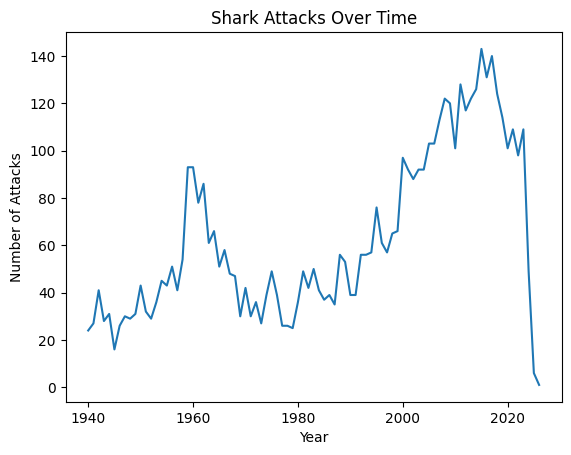

As per the graph, the attacks are increasing over time.


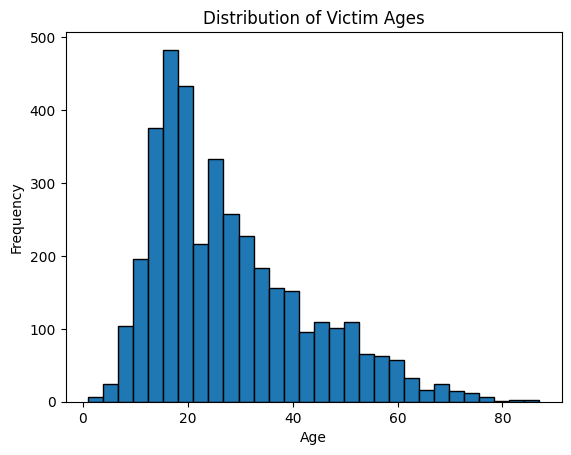

Index(['Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source',
       'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
['M' 'F' nan ' M' 'M ' 'lli' 'M x 2' 'N' '.']
['male' 'female' nan]
Proportion of males is:  0.8032036613272311
['Unprovoked' 'Provoked' ' Provoked' 'Questionable' 'Watercraft'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
['Unprovoked' 'Provoked' 'Unknown']
Proportion of unprovoked attacks: 0.7369851258581236
['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']
['N' 'Y' 'Unknown']
Sex
male      0.86557
female    0.13443
Name: proportion, dtype: float64
Fatality rate for Provoked Attacks:
 Fatal Y/N
N          0.953052
Y          0.032864
Unknown    0.014085
Name: proportion, dtype: float64
Fatality rate for Unprovoked Attacks:
 Fatal

In [79]:
#1
df = pd.read_excel('./data/GSAF5.xls', index_col=0)

#2
df = df.dropna(axis=1, how='all')

#3
print(df['Year'].describe())
print('The range of values I see are 0-2026.')
df_cleaned_year = df[df['Year'] >= 1940]
print(df_cleaned_year['Year'].describe())

import matplotlib.pyplot as plt
df_cleaned_year.groupby('Year').size().plot(kind='line')
plt.title('Shark Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

print('As per the graph, the attacks are increasing over time.')

#4
# Turning invalid ages to be NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#5
print(df.columns)
print(df['Sex'].unique())
# Strip leading and trailing spaces
df['Sex'] = df['Sex'].str.strip()
# Replace unexpected values with NaN
df['Sex'] = df['Sex'].replace(['lli', 'M x 2', 'N', '.'], np.nan)
# Standardize values where M means male and F means female
df['Sex'] = df['Sex'].replace({'M': 'male', 'F': 'female'})
# Checking the cleaned column
print(df['Sex'].unique())

num_of_males = df['Sex'].str.lower().eq('male').sum()
proportion_male = num_of_males / (len(df))
print('Proportion of males is: ', proportion_male)


#6
print(df['Type'].unique())
df['Type'] = df['Type'].str.strip()
valid_types = ['Unprovoked', 'Provoked']
invalid_values = ['Watercraft', 'Sea Disaster', 'Boat', 'nan', '?', 'Unconfirmed', 'Questionable', 'Unverified', 'Invalid', 'Under investigation']
df['Type'] = df['Type'].apply(lambda x: x if x in valid_types else 'Unknown')
print(df['Type'].unique())

# Proportion of unprovoked attacks
unprovoked_count = (df['Type'] == 'Unprovoked').sum()
total_attacks = len(df)
proportion_unprovoked = unprovoked_count / total_attacks
print(f"Proportion of unprovoked attacks: {proportion_unprovoked}")


#7
print(df['Fatal Y/N'].unique())
# Strip whitespace and convert to uppercase
df['Fatal Y/N'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()
# Define valid values
valid_values = {'Y': 'Y', 'N': 'N', 'NQ': 'Unknown', 'UNKNOWN': 'Unknown', 'Y X 2': 'Y', 'F': 'Unknown', 'M': 'Unknown'}
# Apply mapping and replace invalid values with 'Unknown'
df['Fatal Y/N'] = df['Fatal Y/N'].replace(valid_values)
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: 'Unknown' if x not in ['Y', 'N'] else x)
# Check the cleaned unique values
print(df['Fatal Y/N'].unique())



#8
# Filter only unprovoked attacks
unprovoked_attacks = df[df['Type'] == 'Unprovoked']
# Count attacks by gender
gender_counts = unprovoked_attacks['Sex'].value_counts(normalize=True)
print(gender_counts)

fatal_provoked = df[df['Type'] == 'Provoked']['Fatal Y/N'].value_counts(normalize=True)
fatal_unprovoked = df[df['Type'] == 'Unprovoked']['Fatal Y/N'].value_counts(normalize=True)
print("Fatality rate for Provoked Attacks:\n", fatal_provoked)
print("Fatality rate for Unprovoked Attacks:\n", fatal_unprovoked)

fatal_by_gender = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()
print(fatal_by_gender)

print("Men are more likely to be attacked than women but at the same time it seems that the attacks are usually associated with provoking. This makes me feel better about sharks.")

#9

#print(list(df['Species '].unique()))

# Convert to string, lowercase, and split into words
df['Species '] = df['Species '].astype(str).str.lower().str.split()
# Check if "white" is anywhere in the species description
df['White_Shark'] = df['Species '].apply(lambda x: "White Shark" if "white" in x else "Other")
# Calculate the proportion of attacks involving White Sharks
white_shark_attacks = (df['White_Shark'] == "White Shark").sum()
total_attacks = len(df)
proportion_white_shark = white_shark_attacks / total_attacks
print(f"Proportion of attacks by White Sharks: {proportion_white_shark:.2%}")




**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about data tidying, a part of data cleaning. It is about what tidy data is, its key aspects (such as each variable is its own column), and the advantages of using data tidying tools. The paper also illustrates how useful consistent tools and data strucutures are through a case study and the role data tidying can play.

2. The "tidy data standard" is intended to accomplish easier data cleaning where you don't need to start from scratch and instead already have a structured dataset and can now focus on data exploration. Also, it is meant to make it the development of data analysis tools easier since most current ones require translation.

3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that every set of data will need to be formatted in its own way because there are so many different possible layouts, values, units, meanings, desired formats, etc. It is not necessary that you can apply a simple formula to all messy datasets and it will be tidy. The sentence "For a given dataset it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" means that the role of the observations and variables might not be as clear cut when you first see them. It all depends on the person who creates them and the context of the data because they can mean something very specific and not immediately obvious to everyone. Thus it is hard to generalize.

4. Wickham defines values as numbers and strings that belong to values and observations, variables as things that contain values that measure the same attribute across units, and observations as containing all values measured on the same unit across attributes.

5. "Tidy Data" is defined by each variable having a column, each observation forming a row, and each type of observational unit forming a table. It is the standard way of mapping the meaning of the dataset to its structure and depends on how rows, columns, and tables are matched up with observations, variables, and types.

6. The 5 most common problems with messy datasets is that column headers are values not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. The data in Table 4 is messy because there need to be better representation of roles in the data sets (variable column needs to be renamed to income and value column needs to be renamed ro freq). This way each column represents a variable and each row represents an observation. Melting a dataset means to turn columns into rows.

7. Table 11 is messy because element, which is not variable, has variable names instead of values. For the days listed, those are values not variables. Also for months less than 31 days there will be missing values. Table 12 is tidy and molten because it is melted with colvars id, year, month and the column that contains variable names, element. It has each row representing a single day and there are 2 measured variables (tmax and tmin) while the other ones are fixed.

8. The "chicken and the egg" problem refers the the issue where there is an interdependence between tidy data and tools and so it is hard to make individual improvements to either of them because they rely on each other and it doesn't enhance the workflow. Thus, it is very easy to get stuck in a place where progress stalls. What Wickham hopes happens in the future is more development on the framework itself to to develop even better data storage strategies and better tools. In addition to tidying he hopes that more tools are developed overall to address other aspects of data cleaning and thus improving data science as a whole.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?